<a href="https://colab.research.google.com/github/ngochinghiem/secondary-mushroom/blob/main/Nhom6_SecondaryMushroomDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,precision_recall_curve, auc, roc_curve, accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
mushroom = pd.read_csv("/content/sample_data/secondary_data.csv", sep=",")

In [ ]:
mushroom.head(10)

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
5,p,15.34,x,g,o,f,e,NaN,w,17.84,...,s,y,w,u,w,t,p,NaN,d,u
6,p,14.85,f,h,o,f,e,NaN,w,17.71,...,s,y,w,u,w,t,g,NaN,d,w
7,p,14.86,x,h,e,f,e,NaN,w,17.03,...,s,y,w,u,w,t,p,NaN,d,u
8,p,12.85,f,g,o,f,e,NaN,w,17.27,...,s,y,w,u,w,t,p,NaN,d,a
9,p,13.55,f,g,e,f,e,NaN,w,16.04,...,s,y,w,u,w,t,p,NaN,d,w


# **Data Wrangling and Cleansing**




In [ ]:
mushroom.columns

Index(['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

In [ ]:
print("Dữ liệu:", mushroom.shape)

Dữ liệu: (61069, 21)


In [ ]:
print(mushroom.isna().sum())

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64


In [ ]:
for col in mushroom.columns:
  missing_value_size = mushroom[col].isna().sum()
  print(f"Phần trăm giá trị thiếu trong {col} là { missing_value_size / mushroom.shape[0] * 100}%")

Phần trăm giá trị thiếu trong class là 0.0%
Phần trăm giá trị thiếu trong cap-diameter là 0.0%
Phần trăm giá trị thiếu trong cap-shape là 0.0%
Phần trăm giá trị thiếu trong cap-surface là 23.121387283236995%
Phần trăm giá trị thiếu trong cap-color là 0.0%
Phần trăm giá trị thiếu trong does-bruise-or-bleed là 0.0%
Phần trăm giá trị thiếu trong gill-attachment là 16.184971098265898%
Phần trăm giá trị thiếu trong gill-spacing là 41.040462427745666%
Phần trăm giá trị thiếu trong gill-color là 0.0%
Phần trăm giá trị thiếu trong stem-height là 0.0%
Phần trăm giá trị thiếu trong stem-width là 0.0%
Phần trăm giá trị thiếu trong stem-root là 84.39306358381504%
Phần trăm giá trị thiếu trong stem-surface là 62.42774566473989%
Phần trăm giá trị thiếu trong stem-color là 0.0%
Phần trăm giá trị thiếu trong veil-type là 94.79768786127167%
Phần trăm giá trị thiếu trong veil-color là 87.86127167630057%
Phần trăm giá trị thiếu trong has-ring là 0.0%
Phần trăm giá trị thiếu trong ring-type là 4.046242774

In [ ]:
print(mushroom.isna().sum())

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64


In [ ]:
cap_shape={"b": "bell", "c": "conical", "x": "convex", "f": "flat", "p": "spherical", "s": "sunken", "o": "others"}
mushroom["cap-shape"]=mushroom["cap-shape"].replace(cap_shape)

cap_surface={"i": "fibrous", "g": "grooves", "y": "scaly", "s": "smooth","h": "shiny", "l": "leathery", "k": "silky", "t": "sticky"}
mushroom["cap-surface"]=mushroom["cap-surface"].replace(cap_surface)

cap_color={"n": "brown", "b": "buff", "g": "gray", "r": "green", "p": "pink", "u": "purple", "e": "red", "w": "white", "y": "yellow", "l": "blue", "f": "none", "o": "orange","k":"black"}
mushroom["cap-color"]=mushroom["cap-color"].replace(cap_color)

bruises={"t":"bruises","f":"no"}
mushroom["does-bruise-or-bleed"]=mushroom["does-bruise-or-bleed"].replace(bruises)

gill_attachment={"a": "adnate", "x": "adnexed", "d": "decurrent", "e": "free", "s": "sinuate", "p": "pores", "f": "none", "?": "unknown"}
mushroom["gill-attachment"]=mushroom["gill-attachment"].replace(gill_attachment)

gill_spacing={"c": "close", "d":"distant", "f": "none"}
mushroom["gill-spacing"]=mushroom["gill-spacing"].replace(gill_spacing)

mushroom["gill-color"]=mushroom["gill-color"].replace(cap_color)

mushroom["stem-color"]=mushroom["stem-color"].replace(cap_color)

veil_type={"p": "partial", "u": "universal"}
mushroom["veil-type"]=mushroom["veil-type"].replace(veil_type)

mushroom["veil-color"]=mushroom["veil-color"].replace(cap_color)

ring_type={"c": "cobwebby", "e": "evanescent", "f": "flaring", "g": "grooved", "l": "large", "p": "pendant", "s": "sheathing", "z": "zone", "y": "scaly", "m": "movable", "f": "none", "?": "unknown"}
mushroom["ring-type"]=mushroom["ring-type"].replace(ring_type)

mushroom["spore-print-color"]=mushroom["spore-print-color"].replace(cap_color)

habitat={"g": "grasses", "l": "leaves", "m": "meadows", "p": "paths", "h": "heaths", "u": "urban", "w": "waste", "d": "woods"}
mushroom["habitat"]=mushroom["habitat"].replace(habitat)

season={"s": "spring", "u": "summer", "a": "autumn", "w": "winter"}
mushroom["season"]=mushroom["season"].replace(season)

classs={"e":"edible","p":"poisonous"}
mushroom["class"]=mushroom["class"].replace(classs)

In [ ]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [ ]:
mushroom = mushroom.drop(['gill-spacing', 'stem-root', 'stem-surface', 'veil-type', 'veil-color', 'spore-print-color'], axis=1)


In [ ]:
mushroom["cap-surface"] = mushroom["cap-surface"].fillna("unknown")
mushroom["gill-attachment"] = mushroom["gill-attachment"].fillna("unknown")
mushroom["ring-type"] = mushroom["ring-type"].fillna("unknown")

In [ ]:
mushroom["class"] = mushroom["class"].astype('category')
mushroom["class"] = mushroom["class"].cat.codes

mushroom["cap-shape"] = mushroom["cap-shape"].astype('category')
mushroom["cap-shape"] = mushroom["cap-shape"].cat.codes

mushroom["cap-surface"] = mushroom["cap-surface"].astype('category')
mushroom["cap-surface"] = mushroom["cap-surface"].cat.codes

mushroom["cap-color"] = mushroom["cap-color"].astype('category')
mushroom["cap-color"] = mushroom["cap-color"].cat.codes

mushroom["does-bruise-or-bleed"] = mushroom["does-bruise-or-bleed"].astype('category')
mushroom["does-bruise-or-bleed"] = mushroom["does-bruise-or-bleed"].cat.codes

mushroom["gill-attachment"] = mushroom["gill-attachment"].astype('category')
mushroom["gill-attachment"] = mushroom["gill-attachment"].cat.codes

mushroom["gill-color"] = mushroom["gill-color"].astype('category')
mushroom["gill-color"] = mushroom["gill-color"].cat.codes

mushroom["stem-color"] = mushroom["stem-color"].astype('category')
mushroom["stem-color"] = mushroom["stem-color"].cat.codes

mushroom["has-ring"] = mushroom["has-ring"].astype('category')
mushroom["has-ring"] = mushroom["has-ring"].cat.codes

mushroom["ring-type"] = mushroom["ring-type"].astype('category')
mushroom["ring-type"] = mushroom["ring-type"].cat.codes

mushroom["habitat"] = mushroom["habitat"].astype('category')
mushroom["habitat"] = mushroom["habitat"].cat.codes

mushroom["season"] = mushroom["season"].astype('category')
mushroom["season"] = mushroom["season"].cat.codes

In [ ]:
mushroom.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,1,15.26,2,3,6,1,3,10,16.95,17.09,11,1,1,7,3
1,1,16.60,2,3,6,1,3,10,17.99,18.19,11,1,1,7,2
2,1,14.07,2,3,6,1,3,10,17.80,17.74,11,1,1,7,3
3,1,14.17,3,6,9,1,3,10,15.77,15.98,11,1,5,7,3
4,1,14.64,2,6,6,1,3,10,16.53,17.20,11,1,5,7,3


In [ ]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  int8   
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  int8   
 3   cap-surface           61069 non-null  int8   
 4   cap-color             61069 non-null  int8   
 5   does-bruise-or-bleed  61069 non-null  int8   
 6   gill-attachment       61069 non-null  int8   
 7   gill-color            61069 non-null  int8   
 8   stem-height           61069 non-null  float64
 9   stem-width            61069 non-null  float64
 10  stem-color            61069 non-null  int8   
 11  has-ring              61069 non-null  int8   
 12  ring-type             61069 non-null  int8   
 13  habitat               61069 non-null  int8   
 14  season                61069 non-null  int8   
dtypes: float64(3), int8

In [ ]:
mushroom.describe()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
count,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000
mean,0.554913,6.733854,2.713472,6.615500,5.469567,0.826590,3.144836,6.787110,6.581538,12.149410,7.539406,0.248555,4.053726,5.415071,1.053300
std,0.496979,5.264845,1.612337,3.330279,3.727878,0.378605,2.525205,3.849398,3.370017,10.035955,4.246954,0.432179,1.395897,2.677542,1.100575
min,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.480000,2.000000,4.000000,2.000000,1.000000,1.000000,3.000000,4.640000,5.210000,2.000000,0.000000,4.000000,3.000000,0.000000
50%,1.000000,5.860000,2.000000,8.000000,4.000000,1.000000,3.000000,7.000000,5.950000,10.190000,11.000000,0.000000,4.000000,7.000000,1.000000
75%,1.000000,8.540000,3.000000,10.000000,10.000000,1.000000,6.000000,10.000000,7.740000,16.570000,11.000000,0.000000,4.000000,7.000000,2.000000
max,1.000000,62.340000,6.000000,11.000000,11.000000,1.000000,7.000000,11.000000,33.920000,103.910000,12.000000,1.000000,8.000000,7.000000,3.000000


In [ ]:
print(mushroom.isna().sum())

class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64


In [ ]:
mushroom.corr

<bound method DataFrame.corr of        class  cap-diameter  cap-shape  cap-surface  cap-color  \
0          1         15.26          2            3          6   
1          1         16.60          2            3          6   
2          1         14.07          2            3          6   
3          1         14.17          3            6          9   
4          1         14.64          2            6          6   
...      ...           ...        ...          ...        ...   
61064      1          1.18          6            8         11   
61065      1          1.27          3            8         11   
61066      1          1.27          6            8         11   
61067      1          1.24          3            8         11   
61068      1          1.17          6            8         11   

       does-bruise-or-bleed  gill-attachment  gill-color  stem-height  \
0                         1                3          10        16.95   
1                         1              

# **Data Analysis**

In [ ]:
def plot_col(col, color= ['lightblue', 'red'], labels = None, hue = None):
    fig, ax = plt.subplots(figsize=(15, 7))
    sns.countplot(x=col, palette=color, data=mushroom, ax=ax, hue = hue)
    ax.set(title = f"Mushroom {col.title()} Quantity", xlabel=f"{col.title()}", ylabel="Quantity")


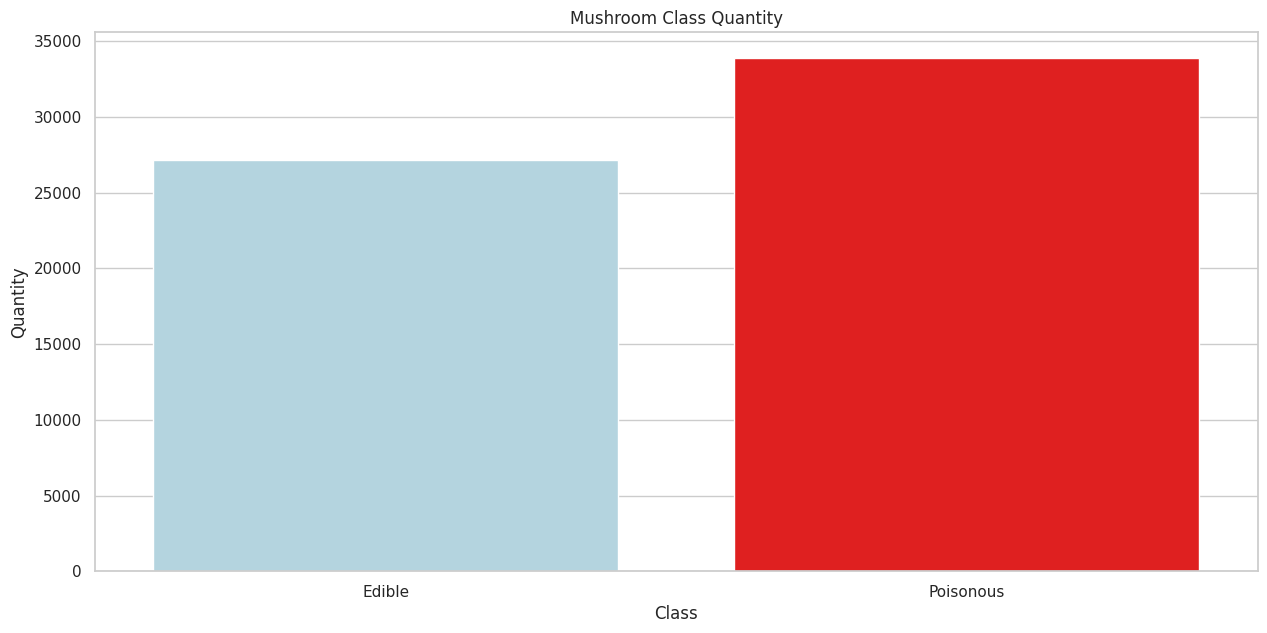

In [ ]:
class_dict = ( 'Edible', 'Poisonous')
plot_col(col = 'class', labels=class_dict)
plt.xticks(ticks=[0, 1], labels=class_dict)
plt.show()

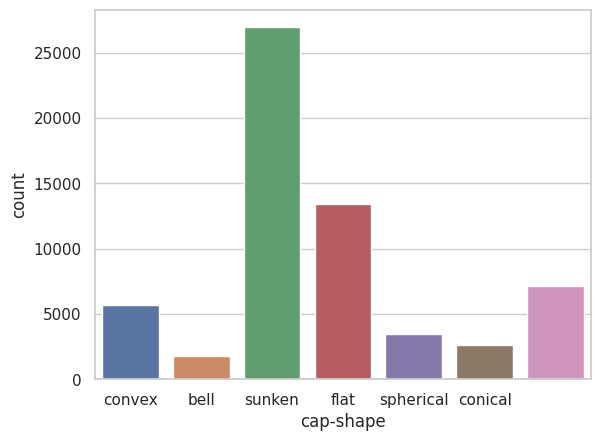

In [ ]:
labels = ('convex', 'bell', 'sunken', 'flat', 'spherical', 'conical')
sns.countplot(data=mushroom, x='cap-shape')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5],labels=labels)
plt.show()

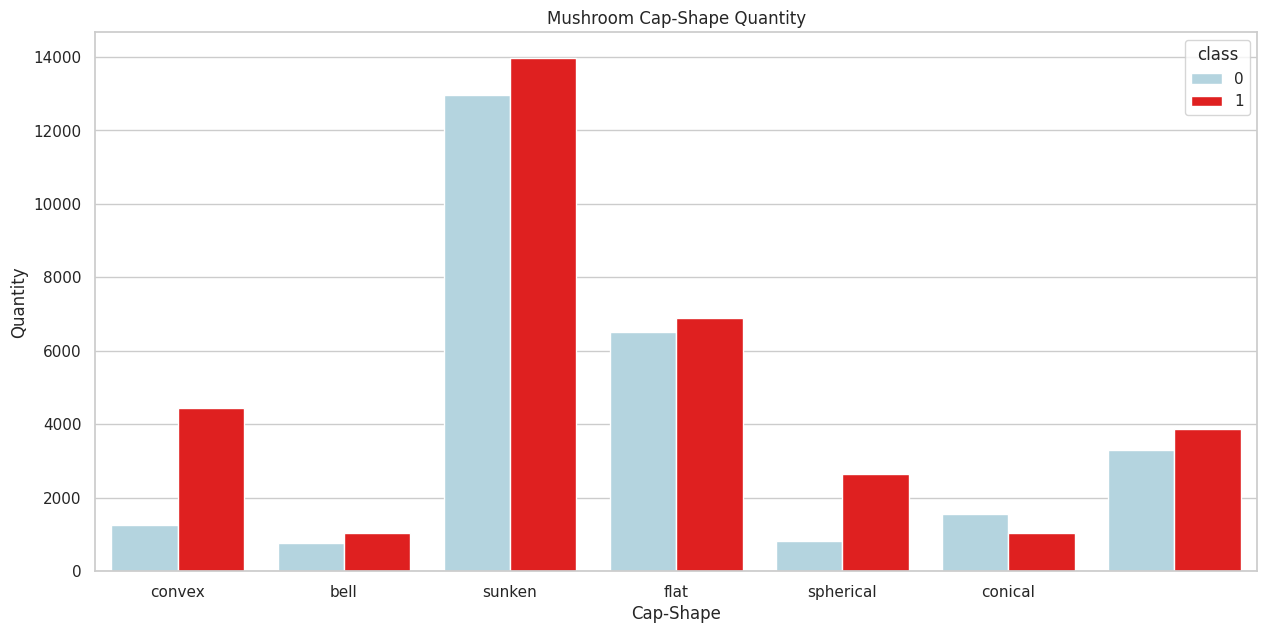

In [ ]:
plot_col(col='cap-shape', hue='class', labels=cap_shape)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5],labels=labels)
plt.show()

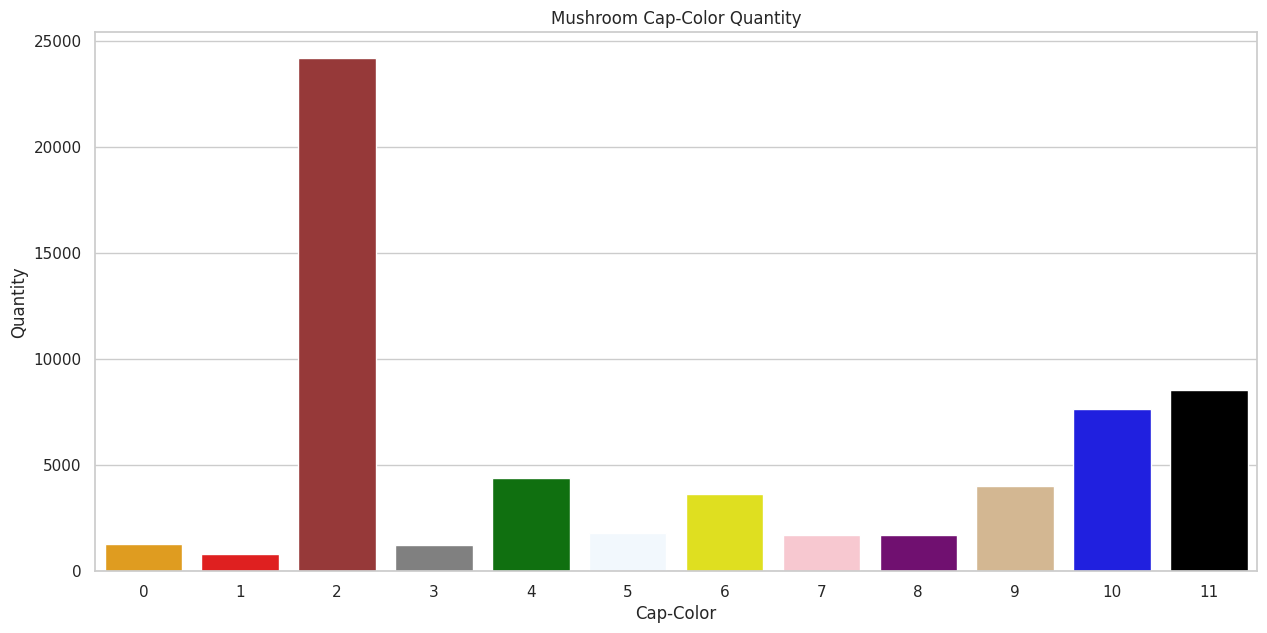

In [ ]:
color_dict = {"orange":"orange", "red":"red", "brown":"brown", "gray":"gray", "green":"green","aliceblue":"white","yellow":"yellow", "pink":"pink", "purple":"purple","burlywood":"buff", "blue":"blue", "black":"black"}
plot_col(col='cap-color', color= color_dict.keys(), labels=cap_color)

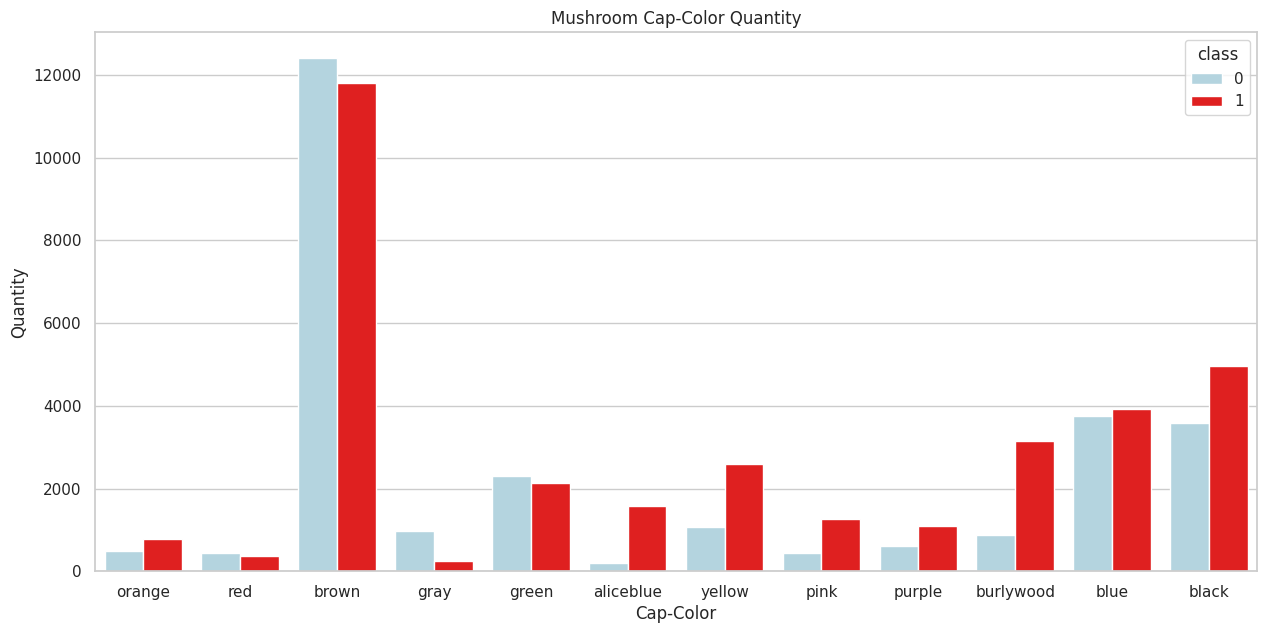

In [ ]:
plot_col(col='cap-color', hue='class', labels=cap_color)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],labels=color_dict)
plt.show()

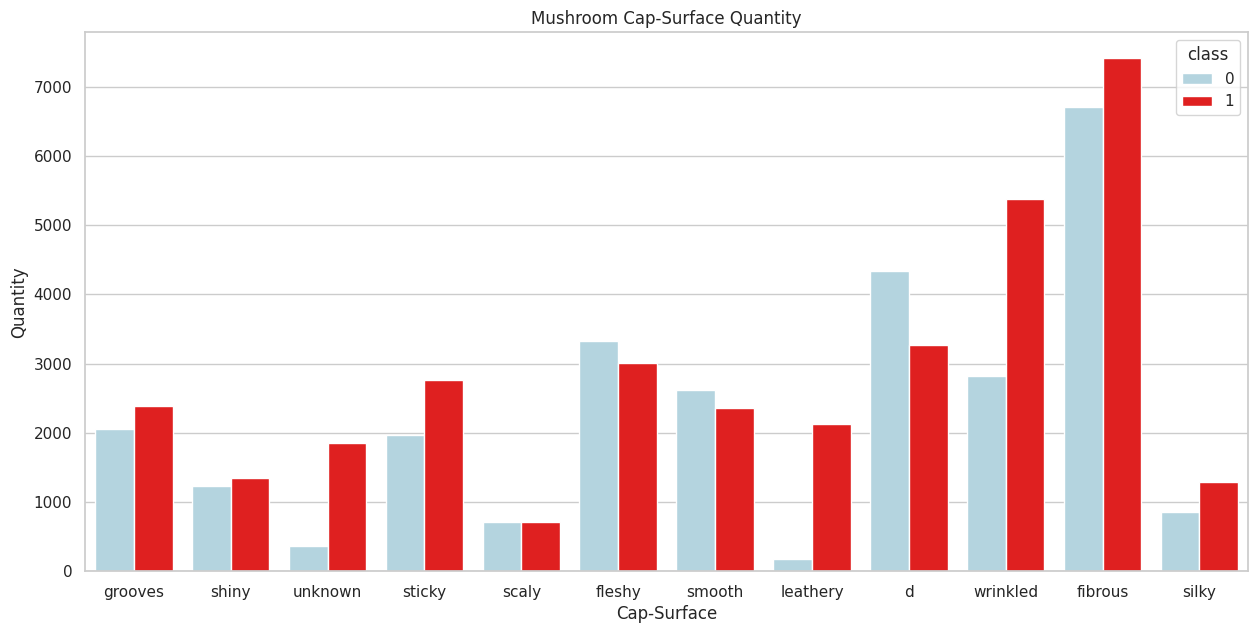

In [ ]:
surface = {"grooves":"grooves", "shiny":"shiny", "unknown":"unknown", "sticky":"sticky", "scaly":"scaly","fleshy":"fleshy","smooth":"smooth", "leathery":"leathery", "d":"d","wrinkled":"wrinkled", "fibrous":"fibrous", "silky":"silky"}
plot_col(col='cap-surface', hue='class', labels=cap_surface)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],labels=surface)
plt.show()

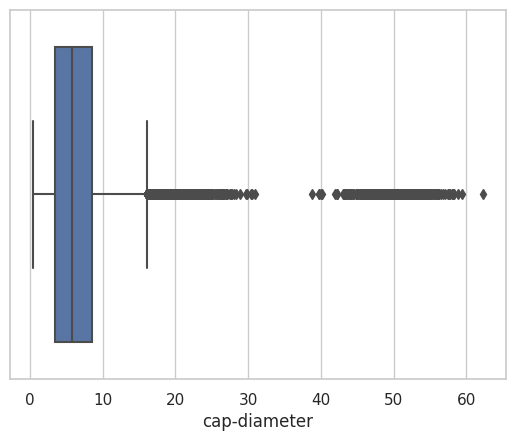

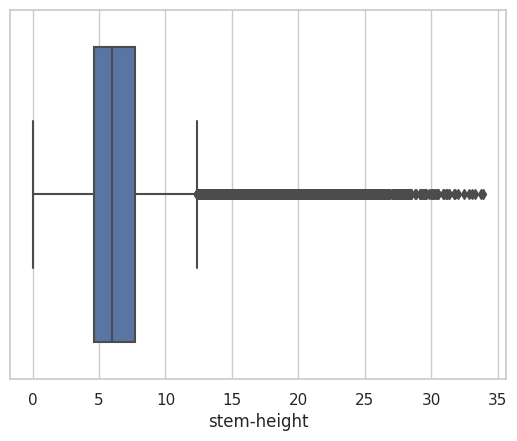

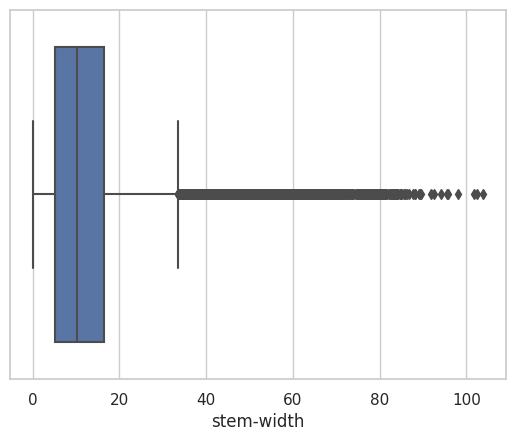

In [ ]:
numerical = mushroom[["cap-diameter", "stem-height", "stem-width"]]
for i in numerical.columns:
    sns.boxplot(x = i, data = numerical)
    plt.show()

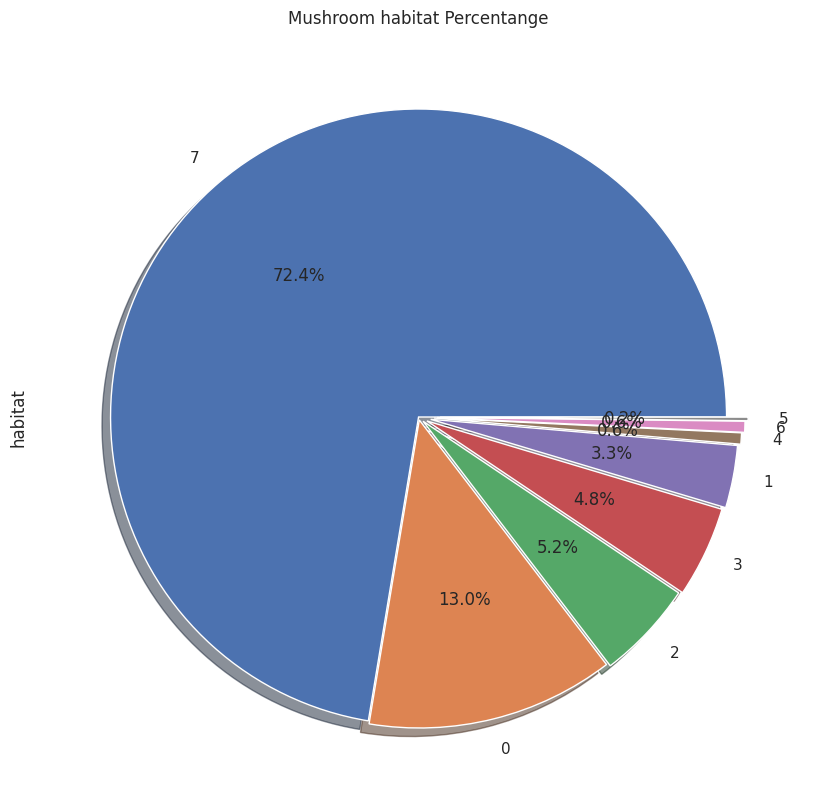

In [ ]:
f, ax = plt.subplots(figsize=(15, 10))
order = list(mushroom['habitat'].value_counts().index)

explode = (0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07)
#explode = {"grasses":"grasses", "leaves":"leaves", "meadows":"meadows", "heaths": "heaths", "paths":"paths", "waste":"waste", "urban":"urban", "woods":"woods"}
mushroom['habitat'].value_counts().plot.pie(explode=explode , autopct='%1.1f%%', labels=order, shadow=True, ax=ax)
ax.set_title('Mushroom habitat Percentange');

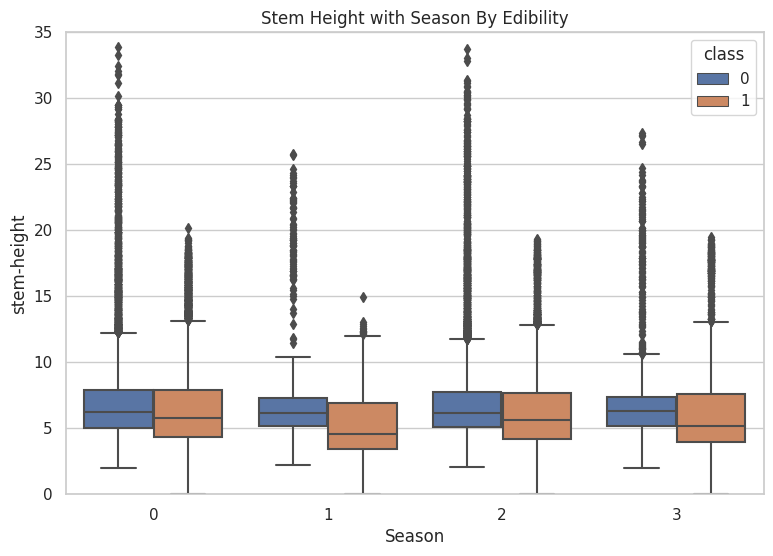

In [ ]:
fig = plt.figure(figsize=(9,6), dpi = 100)
sns.boxplot(data=mushroom, x='season', y='stem-height', hue='class')
plt.title('Stem Height with Season By Edibility')
plt.xlabel('Season')
plt.ylim((0,35))
plt.show()

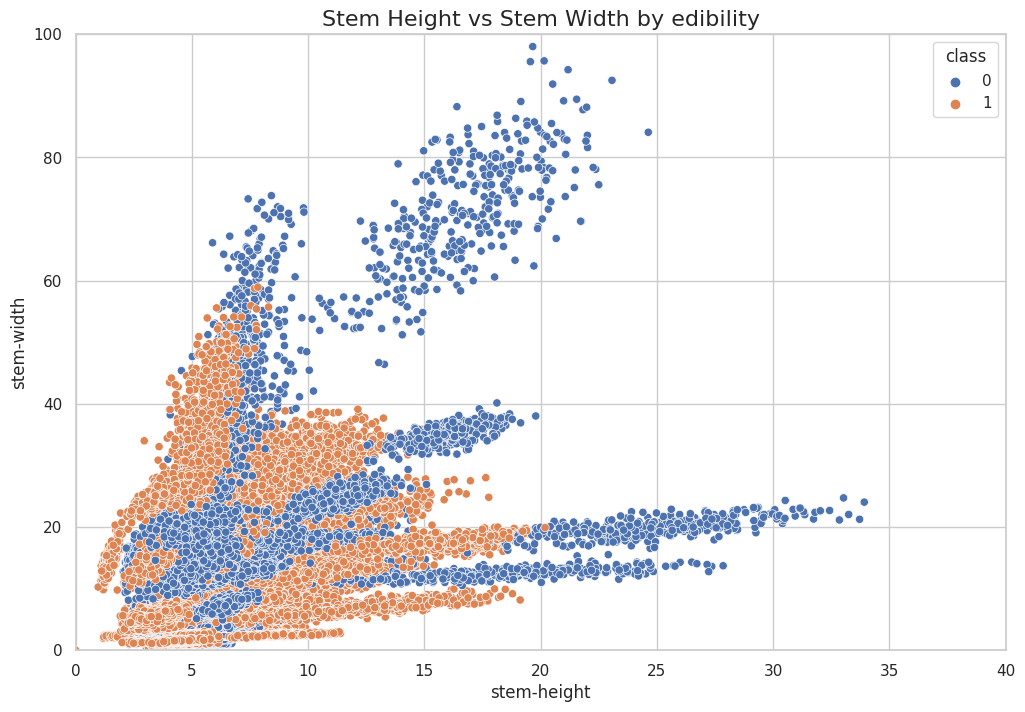

In [ ]:
lead_data = mushroom[['class', 'stem-height', 'stem-width']]

sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.scatterplot(x='stem-height',y='stem-width', data=lead_data, hue = 'class')
plt.title("Stem Height vs Stem Width by edibility", fontsize=16)
plt.xlabel('stem-height')
plt.ylabel('stem-width')
plt.xlim(0,40)
plt.ylim(0,100)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X = mushroom.drop('class', axis=1)
y = mushroom['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

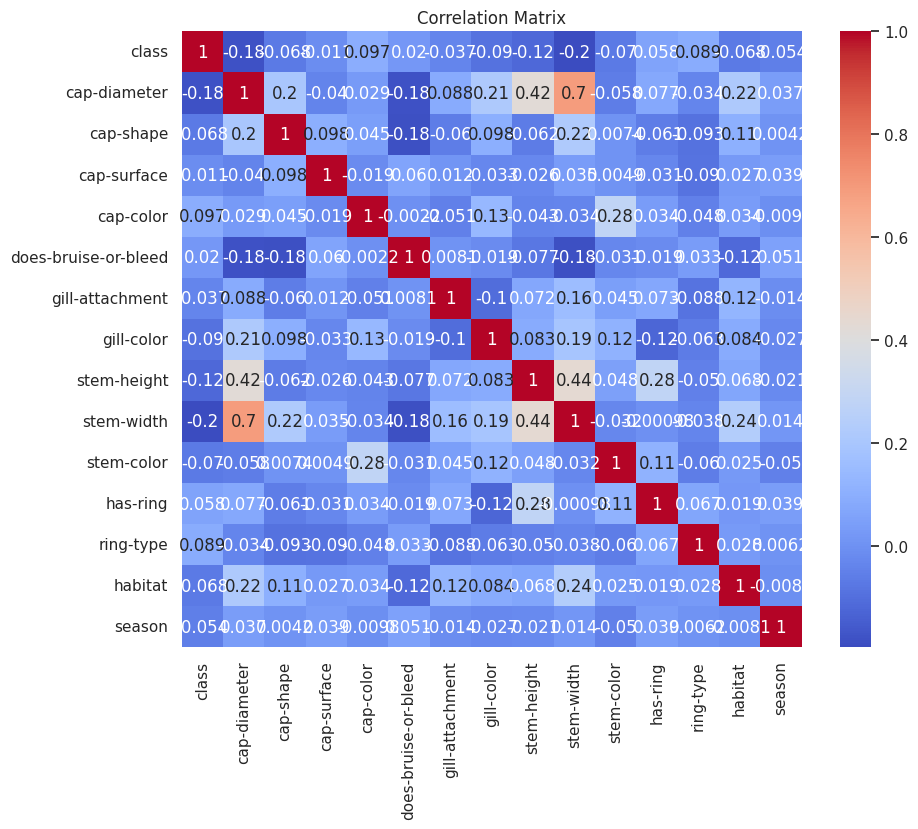

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = mushroom.corr()  # Tạo ma trận tương quan từ DataFrame df
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [ ]:

def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.xticks([0.5, 1.5], ["Edible", "Possinous"])
    plt.yticks([0.5, 1.5], ["Edible", "Possinous"])
    plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier as RF
target_names = ["Edible", "Possinus"]

In [ ]:
rf = RF(n_estimators = 100)#, criterion = 'entropy', random_state = 0)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
Y_pred_rf = rf.predict(X_test)

In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score
print("TEST RESULTS:\n")
#Report
print('Random Forest Classifier report:\n\n{}\n'.format(classification_report(y_test, Y_pred_rf)))
res = cross_val_score(rf, X_test, y_test, cv=10, n_jobs=-1, scoring='accuracy')
#Độ chính xác trung bình
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
#Độ lệch chuẩn
print('Standard Deviation:\t{0:.4f}\n'.format(res.std()))
#Ma trận hỗn hợp
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,rf.predict(X_test))))
#Điểm chính xác
print("Accuracy Score:\t\t{}%".format(round(rf.score(X_test, y_test)*100, 2)))

TEST RESULTS:

Random Forest Classifier report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6781
           1       1.00      1.00      1.00      8487

    accuracy                           1.00     15268
   macro avg       1.00      1.00      1.00     15268
weighted avg       1.00      1.00      1.00     15268


Average Accuracy:	0.9991

Standard Deviation:	0.0005

Confusion Matrix:
[[6778    3]
 [   6 8481]]

Accuracy Score:		99.94%


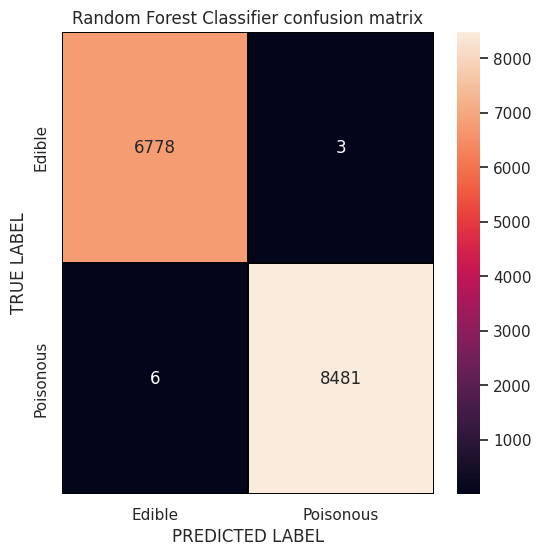

In [ ]:
#Visualize Confusion Matrix (Ma trận hỗn hợp)
cfm_rf = confusion_matrix(y_test, Y_pred_rf)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(6,6))
sns.heatmap(cfm_rf, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.title('Random Forest Classifier confusion matrix')
plt.ylabel('TRUE LABEL')
plt.xlabel('PREDICTED LABEL');
#plt.savefig("rfcm.png", format='png', dpi=150, bbox_inches='tight')
plt.show()

In [ ]:
# Support Vector Machines
from sklearn.svm import SVC
svm = SVC(random_state=42, gamma="auto", probability=True)
svm.fit(X_train,y_train)

SVC(gamma='auto', probability=True, random_state=42)

In [ ]:
Y_pred_svm = svm.predict(X_test)

In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score

print("TEST RESULTS:\n")
#Report
print('Support Vector Machines report:\n\n{}\n'.format(classification_report(y_test, Y_pred_svm)))
res = cross_val_score(svm, X_test, y_test, cv=10, n_jobs=-1, scoring='accuracy')
#Độ chính xác trung bình
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
#Độ lệch chuẩn
print('Standard Deviation:\t{0:.4f}\n'.format(res.std()))
#Ma trận hỗn hợp
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,svm.predict(X_test))))
#Điểm chính xác
print("Accuracy Score:\t\t{}%".format(round(svm.score(X_test, y_test)*100, 2)))

TEST RESULTS:

Support Vector Machines report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6781
           1       1.00      1.00      1.00      8487

    accuracy                           1.00     15268
   macro avg       1.00      1.00      1.00     15268
weighted avg       1.00      1.00      1.00     15268


Average Accuracy:	0.9962

Standard Deviation:	0.0017

Confusion Matrix:
[[6775    6]
 [  23 8464]]

Accuracy Score:		99.81%


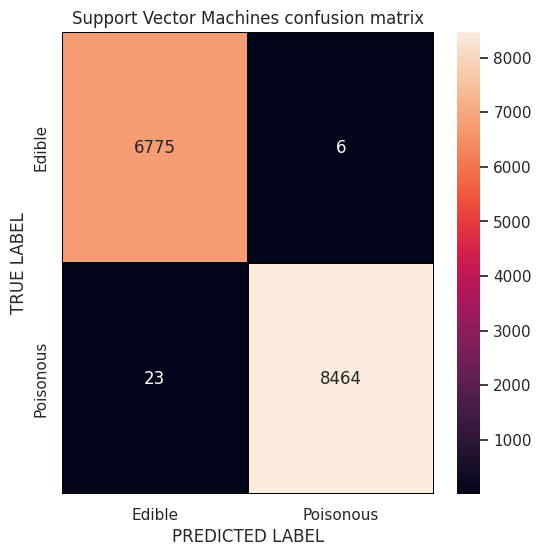

In [ ]:
#Visualize Confusion Matrix (Ma trận hỗn hợp)
cfm_svm = confusion_matrix(y_test, Y_pred_svm)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(6,6))
sns.heatmap(cfm_svm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.title('Support Vector Machines confusion matrix')
plt.ylabel('TRUE LABEL')
plt.xlabel('PREDICTED LABEL');
#plt.savefig("svmcm.png", format='png', dpi=150, bbox_inches='tight')
plt.show()
#(edible:0 poisonous:1)

In [ ]:
results = pd.DataFrame({
    'Model': ['Random Forest','Support Vector Machine'],
    'Score': [99.96,99.81]
    })

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
99.96,Random Forest
99.81,Support Vector Machine
